In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
Measurement = Base.classes.measurement
results = session.query(Measurement.date, Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "06")

In [5]:
#  3. Convert the June temperatures to a list.
june_temps = list(results)

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_temps)
#df.head()

In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,tobs
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_results = session.query(Measurement.date, Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "12")

In [9]:
# 7. Convert the December temperatures to a list.
dec_temps = list(dec_results)

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_temps)

In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,tobs
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## D3: Weather Data Histogram for June and December

<AxesSubplot:ylabel='Frequency'>

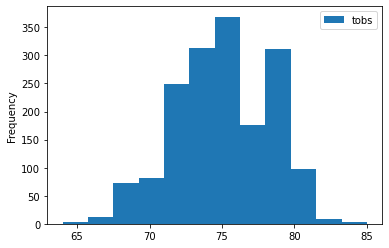

In [13]:
results_jun = session.query(Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "06")
df = pd.DataFrame(results_jun, columns=['tobs'])
df.plot.hist(bins=12)

<AxesSubplot:ylabel='Frequency'>

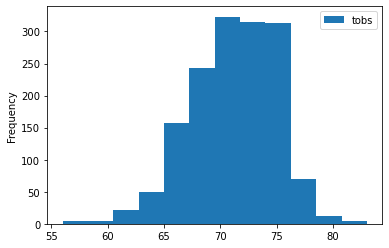

In [14]:
results_dec = session.query(Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "12")
df = pd.DataFrame(results_dec, columns=['tobs'])
df.plot.hist(bins=12)

## D3: Precipitation Trends for June and December

<AxesSubplot:xlabel='date'>

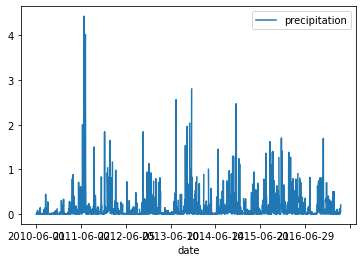

In [17]:
results_june = session.query(Measurement.date, Measurement.prcp).filter(func.strftime("%m", Measurement.date) == "06")
df_jun = pd.DataFrame(results_june, columns=['date','precipitation'])
df_jun.set_index(df_jun['date'], inplace=True)
df_jun = df_jun.sort_index()
df_jun.plot()

<AxesSubplot:xlabel='date'>

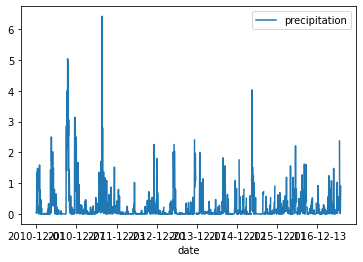

In [18]:
results_dec = session.query(Measurement.date, Measurement.prcp).filter(func.strftime("%m", Measurement.date) == "12")
df_dec = pd.DataFrame(results_dec, columns=['date','precipitation'])
df_dec.set_index(df_dec['date'], inplace=True)
df_dec = df.sort_index()
df_dec.plot()